In [3]:
import numpy as np
from scipy import sparse

# 参数设置
m = 128
n = 256

# 生成高斯随机矩阵 A ∈ ℝ^{m×n}
A = np.random.randn(m, n)

# 生成稀疏信号 精确解u ∈ ℝ^n，稀疏度为 10%
sparsity = 0.1
# u = sparse.random(n, 1, density=sparsity, data_rvs=np.random.randn).toarray()#得到的是二维(n,1)，否则# A @ x 是 (m,) ，而 b 是 (m,1)，出现广播，cvxpy要报错
u = sparse.random(n, 1, density=sparsity, data_rvs=np.random.randn).toarray().flatten()  # 转为 (n,)

# 计算观测值 b = A @ u
b = A @ u

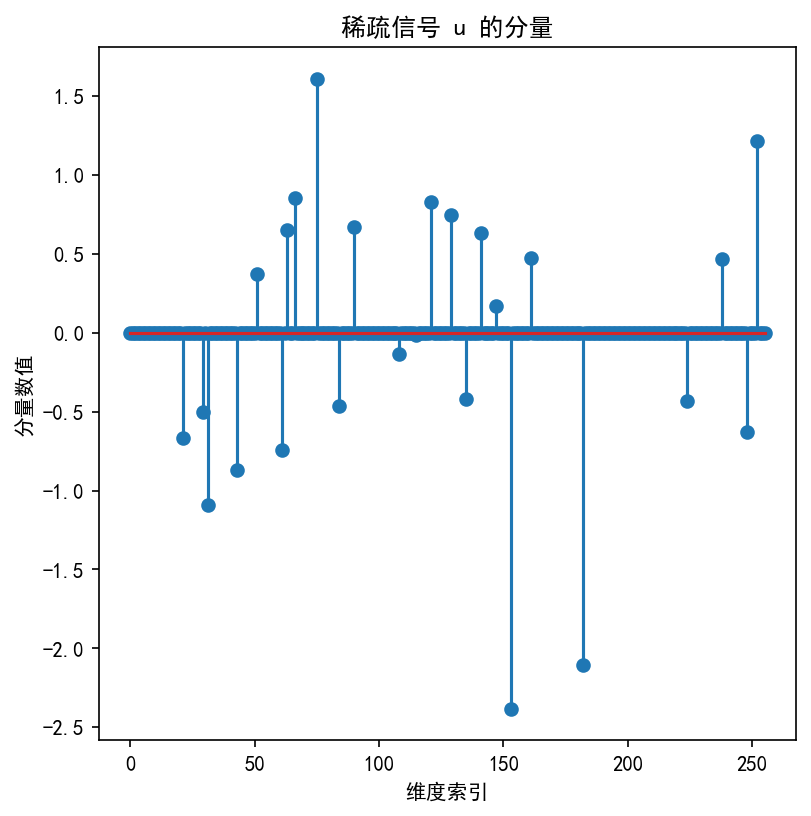

In [4]:
# 画图
import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置支持中文字体和负号正常显示
rcParams['font.sans-serif'] = ['SimHei']  # 指定黑体
rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
plt.figure(figsize=(6, 6))
plt.stem(u)
plt.title("稀疏信号 u 的分量")
plt.xlabel("维度索引")
plt.ylabel("分量数值")

# 保存为 SVG 文件
plt.savefig("../images/01b-精确解u的分布.svg", format="svg")

plt.show()

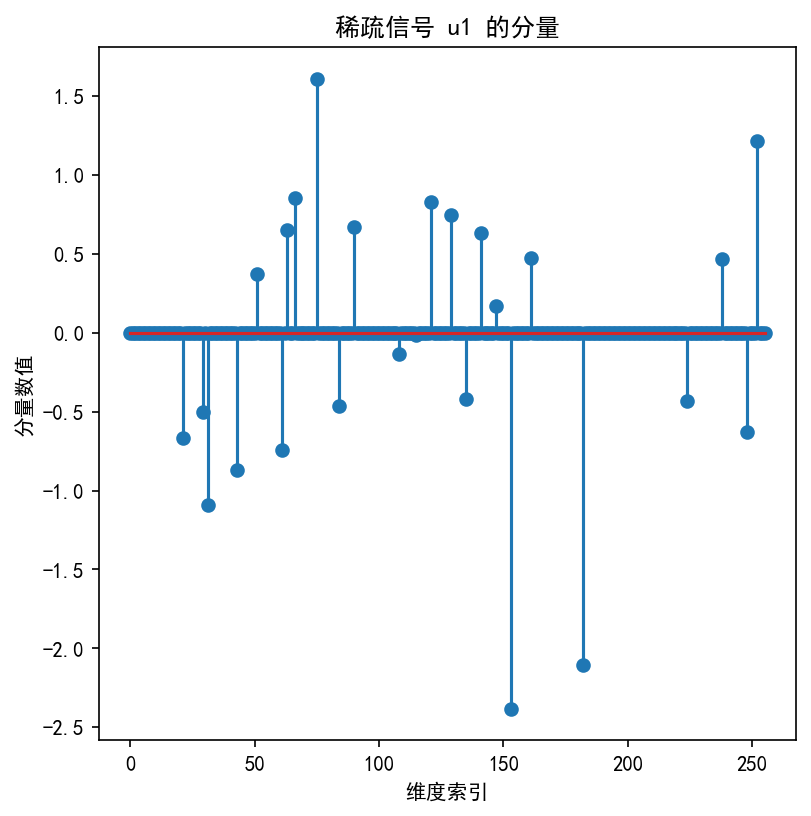

In [5]:
# 用cvxpy求解L1范数最小化
import cvxpy as cp
# 定义优化问题
x1 = cp.Variable(n)#定义一个优化变量 x ∈ ℝⁿ
objective = cp.Minimize(cp.norm(x1, 1))  # ℓ1范数
constraints = [A @ x1 == b]             # 约束条件，信号 x 应满足观测条件

# 求解
prob1 = cp.Problem(objective, constraints)
prob1.solve(solver=cp.SCS)
u1 = x1.value

# 画出恢复信号分布（非零部分）
plt.figure(figsize=(6, 6))
plt.stem(u1)
plt.title("稀疏信号 u1 的分量")
plt.xlabel("维度索引")
plt.ylabel("分量数值")
plt.savefig("../images/01c-ℓ1范数下解u1的分布.svg", format="svg")


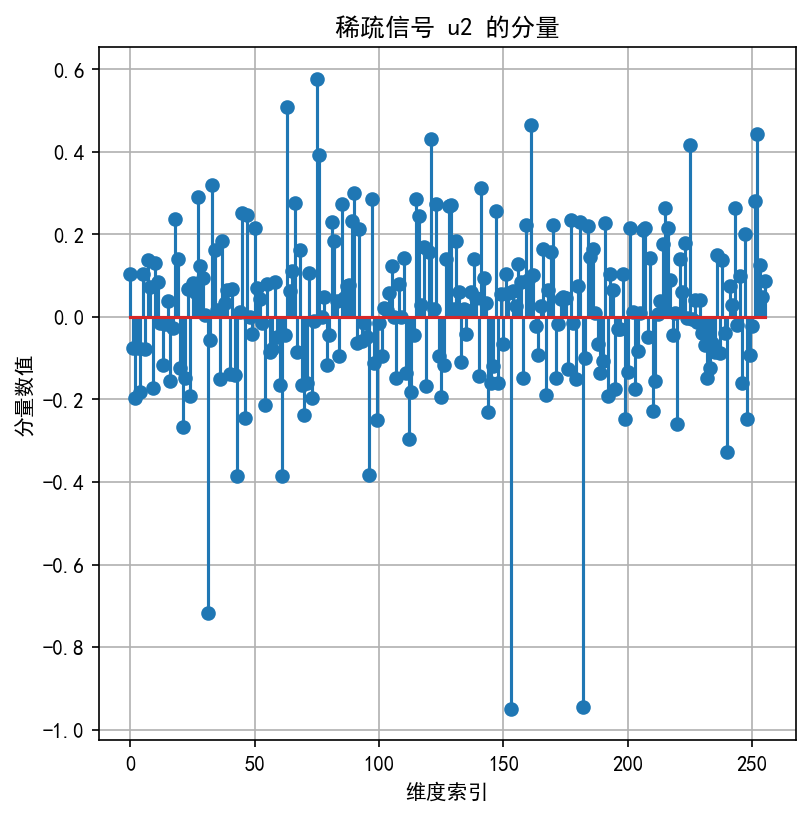

In [6]:
# 用cvxpy求解L2范数最小化
import cvxpy as cp
# 定义优化问题
x2 = cp.Variable(n)
objective = cp.Minimize(cp.norm(x2, 2))  # ℓ2范数
constraints = [A @ x2 == b]             # 约束条件

# 求解
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS)
u2 = x2.value

# 画出恢复信号分布（非零部分）
plt.figure(figsize=(6, 6))
plt.stem(u2)
plt.title("稀疏信号 u2 的分量")
plt.xlabel("维度索引")
plt.ylabel("分量数值")
plt.grid(True)
plt.savefig("../images/01d-ℓ2范数下解u2的分布.svg", format="svg")
